# OVERFLOW

# Run python script to have figure

To have figure you need 3 outputs:
- output filename
- mesh_mask file (output via namelist parameter nn_msh=1 in "namdom" block)
- time step value

## Do figure with python script: 

In [104]:
%pylab inline
from netCDF4 import Dataset
import numpy as np
import sys 
import matplotlib.pyplot as plt 
import pylab
import scipy

Populating the interactive namespace from numpy and matplotlib


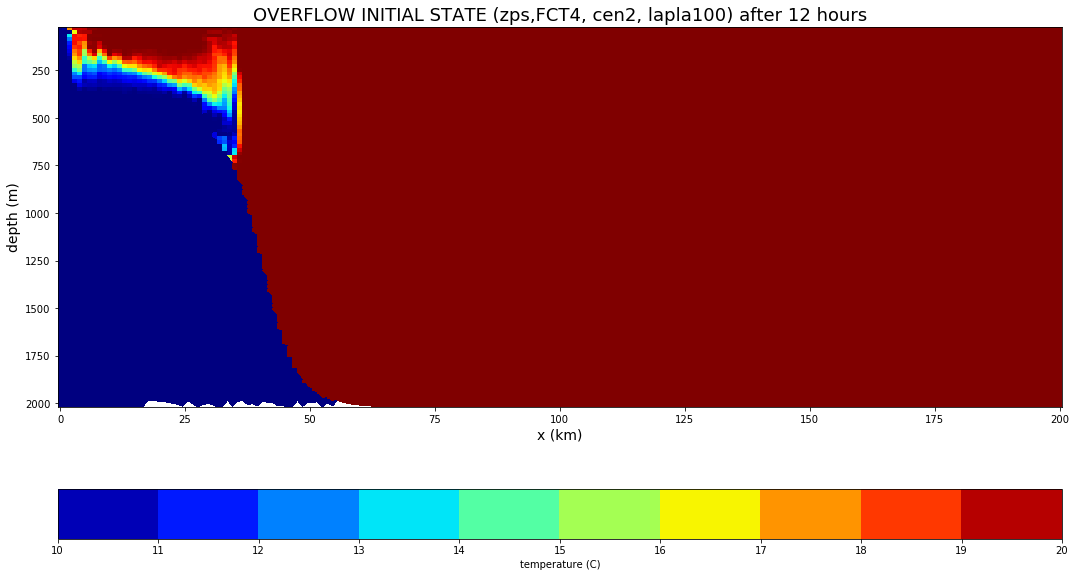

In [144]:
time='6'
ncfile = Dataset('OVF_zps_FCT4_fluxcen2_lapahm100_avm0001_grid_T.nc', mode='r')

# read mesh_mask
ncmesh = Dataset('mesh_mask_OVF_zps.nc')
lat2d  = ncmesh.variables['gphit'][  :,:].squeeze()
lon2d  = ncmesh.variables['glamt'][  :,:].squeeze()
msk    = ncmesh.variables['tmask'][0,:,:].squeeze()
ncmesh.close()

thetao_nav=ncfile.variables['nav_lon'][1,:] 

thetao_inst=ncfile.variables['thetao_inst'][time,:,1,:]
thetao_e3t_inst=ncfile.variables['e3t_inst'][time,:,1,:]

thetao_depth=thetao_e3t_inst.squeeze()  
thetao_depth=np.cumsum(thetao_depth,0)  
thetao_nav=np.tile(thetao_nav,(np.size(thetao_depth,0),1))


#fig=plt.figure()
fig = plt.figure(figsize=(18,10)) 
ax=plt.gca()  #get current axis
plt.pcolor(thetao_nav,thetao_depth,thetao_inst,vmin=10,vmax=20,cmap='jet')
plt.ylim(np.min(thetao_depth),np.max(thetao_depth))  
plt.xlim(np.min(thetao_nav),np.max(thetao_nav))  
ax.invert_yaxis() 

bounds=np.linspace(10,20,11)
cb=plt.colorbar(orientation='horizontal', spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
#cb=plt.colorbar(orientation='horizontal')  
cb.set_label('temperature (C)')

plt.ylabel('depth (m)',fontsize=14)
plt.xlabel('x (km)',fontsize=14)
plt.title('OVERFLOW INITIAL STATE (zps,FCT4, cen2, lapla100) after 12 hours', fontsize='18')

#"Some title", fontname='Ubuntu', fontsize=14,
#           fontstyle='italic', fontweight='bold',
#         fontcolor='green'

ncfile.close()


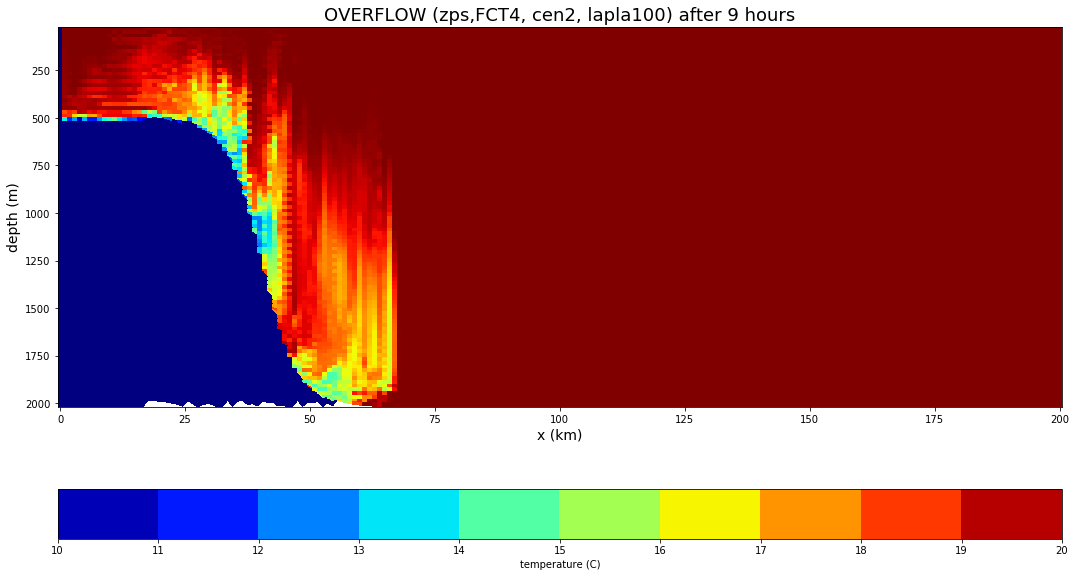

In [143]:
time='18'
ncfile = Dataset('OVF_zps_FCT4_fluxcen2_lapahm100_avm0001_grid_T.nc', mode='r')

# read mesh_mask
ncmesh = Dataset('mesh_mask_OVF_zps.nc')
lat2d  = ncmesh.variables['gphit'][  :,:].squeeze()
lon2d  = ncmesh.variables['glamt'][  :,:].squeeze()
msk    = ncmesh.variables['tmask'][0,:,:].squeeze()
ncmesh.close()

thetao_nav=ncfile.variables['nav_lon'][1,:] 

thetao_inst=ncfile.variables['thetao_inst'][time,:,1,:]
thetao_e3t_inst=ncfile.variables['e3t_inst'][time,:,1,:]

thetao_depth=thetao_e3t_inst.squeeze()  
thetao_depth=np.cumsum(thetao_depth,0)  
thetao_nav=np.tile(thetao_nav,(np.size(thetao_depth,0),1))


#fig=plt.figure()
fig = plt.figure(figsize=(18,10)) 
ax=plt.gca()  #get current axis
plt.pcolor(thetao_nav,thetao_depth,thetao_inst,vmin=10,vmax=20,cmap='jet')
plt.ylim(np.min(thetao_depth),np.max(thetao_depth))  
plt.xlim(np.min(thetao_nav),np.max(thetao_nav))  
ax.invert_yaxis() 

bounds=np.linspace(10,20,11)
cb=plt.colorbar(orientation='horizontal', spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
#cb=plt.colorbar(orientation='horizontal')  
cb.set_label('temperature (C)')

plt.ylabel('depth (m)',fontsize=14)
plt.xlabel('x (km)',fontsize=14)
plt.title('OVERFLOW (zps,FCT4, cen2, lapla100) after 9 hours', fontsize='18')

#"Some title", fontname='Ubuntu', fontsize=14,
#           fontstyle='italic', fontweight='bold',
#         fontcolor='green'

ncfile.close()